<a href="https://colab.research.google.com/github/Leucocitokiller/Proyecto-Fina-NLP/blob/main/Proyecto_final_NLP_Redes_Neuronales_Libenson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducci√≥n.

En este trabajo pr√°ctico se aborda el an√°lisis y clasificaci√≥n de opiniones de usuarios mediante t√©cnicas de Procesamiento de Lenguaje Natural (NLP) y Machine Learning. Se emplean dos conjuntos de datos distintos, provenientes de plataformas reconocidas: Yelp, que contiene rese√±as de locales de comida, y Amazon, que incluye comentarios sobre productos.

# Objetivos.

El objetivo principal es desarrollar un modelo capaz de identificar autom√°ticamente si un comentario es positivo o negativo, independientemente de la tem√°tica o sector al que pertenezca. Para ello, se aplican diferentes herramientas y t√©cnicas propias del NLP, tales como el tokenizado, lemmatizaci√≥n, entre otras, que permiten transformar los textos en formatos adecuados para su an√°lisis computacional.

Posteriormente, se prueba una variedad de modelos de machine learning para evaluar cu√°l es el m√°s efectivo en la clasificaci√≥n de sentimientos en ambos datasets. Esto incluye desde modelos cl√°sicos hasta t√©cnicas m√°s avanzadas, buscando generalizar el aprendizaje para que el modelo pueda detectar la polaridad del comentario m√°s all√° del contexto espec√≠fico.

Este enfoque facilita no solo el entendimiento de las opiniones expresadas por los usuarios, sino que tambi√©n permite desarrollar sistemas automatizados de an√°lisis de sentimientos √∫tiles en distintas aplicaciones comerciales y de investigaci√≥n.

# Origen de los datos.

Los datos pertenecen a una adaptaci√≥n de los comentarios de yelp y amazon y fueron obtenidos del siguiente link de Github:

https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/2-Deep_Learning/PLN/Datasets/DataSetOpiniones.zip

Datos del autor:

https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/2-Deep_Learning/PLN/Datasets/readme.md



# Importaci√≥n de Librer√≠as.

In [1]:
import urllib.request
import numpy as np
import pandas as pd
import os
import time
import sys
#-----librerias para trabajar NLP
!python -m spacy download es_core_news_md
import spacy
import es_core_news_md
#es_core_news_md Medium (modelo mediano):
#Es m√°s pesado y m√°s lento que el sm, pero mucho m√°s preciso. Tiene vectores de palabras, entiende mejor el significado de las palabras.

#-----instalaci√≥n d librerias para an√°lisis de sentimientos.
!pip install spacy spacy-transformers
!pip install pysentimiento
from pysentimiento import create_analyzer

#----librerias para normalizaci√≥n de textos
import re
from unicodedata import normalize
import unicodedata
from collections import Counter


#----librerias para graficar y wordcloud.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#----librer√≠as para trabajar con TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
#----libreria para trabajar con BoW.
from sklearn.feature_extraction.text import CountVectorizer
#----librerias para Machine learning
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
#----librerias de Redes Neuronales.
# Importamos el Tokenizer para procesar el texto y convertirlo en secuencias num√©ricas
from tensorflow.keras.preprocessing.text import Tokenizer
# Importamos la funci√≥n para rellenar las secuencias con ceros y asegurarnos que todas tengan la misma longitud
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
# Importamos el modelo secuencial de Keras, que permite apilar capas de manera lineal
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
!pip install keras-tuner
import keras_tuner as kt
# Importamos las capas necesarias:
# - Embedding: para convertir √≠ndices de palabras en vectores densos.
# - SimpleRNN: una capa recurrente que procesa secuencias de datos.
# - Dense: una capa totalmente conectada, utilizada para la salida del modelo.



     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 14.3 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.0/44.0 kB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 756.2/756.2 kB 17.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 314.0/314.0 kB 22.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚

# Desarrollo.

# Procesamiento de la Fuente de Datos.

## Conexi√≥n con la fuente de datos.


Se cargan dos dataset desde Github que contienen comentarios sobre celulares (Amanzon) y servicio de restaurantes (Yelp). Ambos dataset se unifican para tener un mayor volumen de datos para analizar.

Los mismos estan compuestos por dos columnas, una con los comentarios de cada usario registrado y otra con el valor asignado a ese comentario.
Si el comentario tiene un valor 1 se lo considera positivo y si tiene valor 2 como negativo.

In [2]:
# Diccionario con las fuentes y sus URLs
filepath_dict = {
    'yelp': 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/main/yelp_comentarios.csv',
    'amazon': 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/main/amazon_cells_comentarios.csv'

}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['Comentario', 'Valor'], sep=';', encoding='latin-1')
    df['Origen'] = source  # se agrega una nueva columna para saber si los comentarios son de Yelp o Amazon.
    df_list.append(df)

df = pd.concat(df_list)
df.head(1100)

Comentario  Valor  Origen
0                       Wow ... Me encant√≥ este lugar.      1    yelp
1                              La corteza no es buena.      0    yelp
2    No sabroso y la textura era simplemente desagr...      0    yelp
3    Me detuve durante las vacaciones de fines de m...      1    yelp
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp
..                                                 ...    ...     ...
96          Si planeas usar esto en un auto, olv√≠dalo.      0  amazon
97            Encontr√© este producto demasiado grande.      0  amazon
98   Lo mejor que he encontrado hasta ahora ... He ...      1  amazon
99             Estoy muy decepcionado con mi decisi√≥n.      0  amazon
100  Integrado a la perfecci√≥n con el tel√©fono Moto...      1  amazon

[1100 rows x 3 columns]

## Normalizaci√≥n de la Fuente de datos.


### Eliminaci√≥n de signos de puntuaci√≥n.

In [3]:
# Definici√≥n de funci√≥n para eliminar los signos de puntuaci√≥n utilizando re, pero considerando no borrar las vocales con acento.

def remove_punctuation(text):
    # Normaliza el texto a NFKD para separar letras y sus tildes
    text = unicodedata.normalize('NFKD', text)
    # Elimina los caracteres diacr√≠ticos (como las tildes)
    text = ''.join(c for c in text if not unicodedata.combining(c))
    # Elimina todo lo que no sea letras, n√∫meros o espacios
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text


# Aplicar la funci√≥n a la columna 'review_lower'
df['Comentarios'] = df['Comentario'].apply(remove_punctuation)

In [4]:
df

Comentario  Valor  Origen  \
0                       Wow ... Me encant√≥ este lugar.      1    yelp   
1                              La corteza no es buena.      0    yelp   
2    No sabroso y la textura era simplemente desagr...      0    yelp   
3    Me detuve durante las vacaciones de fines de m...      1    yelp   
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp   
..                                                 ...    ...     ...   
995  La pantalla se mancha f√°cilmente porque toca l...      0  amazon   
996  Qu√© pedazo de chatarra ... Pierdo m√°s llamadas...      0  amazon   
997             El art√≠culo no coincide con la imagen.      0  amazon   
998  Lo √É¬∫nico que me decepcion√≥ es el puerto infra...      0  amazon   
999  No se puede contestar llamadas con la unidad, ...      0  amazon   

                                           Comentarios  
0                           Wow  Me encanto este lugar  
1                               La corteza no es buena  
2    No sabroso y la textura era simplemente desagr...  
3    Me detuve durante las vacaciones de fines de m...  
4    La seleccion en el menu era genial al igual qu...  
..                                                 ...  
995  La pantalla se mancha facilmente porque toca l...  
996  Que pedazo de chatarra  Pierdo mas llamadas en...  
997              El articulo no coincide con la imagen  
998  Lo Aonico que me decepciono es el puerto infra...  
999  No se puede contestar llamadas con la unidad n...  

[1999 rows x 4 columns]

### Reducir a min√∫sculas el texto.

In [5]:
# Create a new column 'Comentarios_lower' with lowercase values from 'Comentario'
df['Comentarios_lower'] = df['Comentarios'].str.lower()

In [6]:
df

Comentario  Valor  Origen  \
0                       Wow ... Me encant√≥ este lugar.      1    yelp   
1                              La corteza no es buena.      0    yelp   
2    No sabroso y la textura era simplemente desagr...      0    yelp   
3    Me detuve durante las vacaciones de fines de m...      1    yelp   
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp   
..                                                 ...    ...     ...   
995  La pantalla se mancha f√°cilmente porque toca l...      0  amazon   
996  Qu√© pedazo de chatarra ... Pierdo m√°s llamadas...      0  amazon   
997             El art√≠culo no coincide con la imagen.      0  amazon   
998  Lo √É¬∫nico que me decepcion√≥ es el puerto infra...      0  amazon   
999  No se puede contestar llamadas con la unidad, ...      0  amazon   

                                           Comentarios  \
0                           Wow  Me encanto este lugar   
1                               La corteza no es buena   
2    No sabroso y la textura era simplemente desagr...   
3    Me detuve durante las vacaciones de fines de m...   
4    La seleccion en el menu era genial al igual qu...   
..                                                 ...   
995  La pantalla se mancha facilmente porque toca l...   
996  Que pedazo de chatarra  Pierdo mas llamadas en...   
997              El articulo no coincide con la imagen   
998  Lo Aonico que me decepciono es el puerto infra...   
999  No se puede contestar llamadas con la unidad n...   

                                     Comentarios_lower  
0                           wow  me encanto este lugar  
1                               la corteza no es buena  
2    no sabroso y la textura era simplemente desagr...  
3    me detuve durante las vacaciones de fines de m...  
4    la seleccion en el menu era genial al igual qu...  
..                                                 ...  
995  la pantalla se mancha facilmente porque toca l...  
996  que pedazo de chatarra  pierdo mas llamadas en...  
997              el articulo no coincide con la imagen  
998  lo aonico que me decepciono es el puerto infra...  
999  no se puede contestar llamadas con la unidad n...  

[1999 rows x 5 columns]

### Convertir a n√∫mero la columna Valor para su postprocesamiento.

In [7]:
# Convertimos la columna rating a valor num√©rico
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

In [8]:
df['Valor']

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Valor, Length: 1999, dtype: int64

# NLP

## Pre Procesamiento.

### Generaci√≥n del objeto de SPacy para utilizar en el procesamiento del texto en espa√±ol.

In [9]:
nlp = es_core_news_md.load()

### Convertir texto a min√∫sculas y Tokenizaci√≥n.

In [10]:
df['Comentarios_tokenizados'] = df['Comentarios_lower'].apply(lambda text: nlp(text))
df[['Comentarios_lower','Comentarios_tokenizados']].head()

Comentarios_lower  \
0                         wow  me encanto este lugar   
1                             la corteza no es buena   
2  no sabroso y la textura era simplemente desagr...   
3  me detuve durante las vacaciones de fines de m...   
4  la seleccion en el menu era genial al igual qu...   

                             Comentarios_tokenizados  
0                 (wow,  , me, encanto, este, lugar)  
1                       (la, corteza, no, es, buena)  
2  (no, sabroso, y, la, textura, era, simplemente...  
3  (me, detuve, durante, las, vacaciones, de, fin...  
4  (la, seleccion, en, el, menu, era, genial, al,...

### Remoci√≥n de StopWords

In [11]:
# Lista de palabras que NO queremos eliminar (tienen carga emocional)
palabras_sentimiento = {
    # Positivas
    "bueno", "buena","si","buen√≠simo", "excelentes", "excelente", "genial", "maravilloso", "maravilla", "fant√°stico", "fabuloso", "incre√≠ble",
    "perfecto", "perfecta", "agradable", "satisfecho", "satisfecha", "contento", "contenta", "encantado", "encantada",
    "amable", "simp√°tico", "simp√°tica", "r√°pido", "r√°pida", "c√≥modo", "c√≥moda", "eficaz", "eficiente", "f√°cil",
    "recomendable", "ideal", "espectacular", "feliz", "brillante", "cumpli√≥", "cumple", "funciona", "funciona bien",
    "inmejorable", "confiable", "duradero", "cumplidor", "seguro", "preciso", "elegante", "atento", "responsable",
    "acertado", "destacado", "excepcional", "impecable", "sensacional", "√∫til", "accesible", "econ√≥mico", "funcional",
    "intuitivo", "conveniente", "hermoso", "linda", "precioso", "excelente calidad", "vale la pena",

    # Negativas
    "malo","no", "mala", "mal", "p√©simo", "p√©sima","nunca", "horrible", "fatal", "insoportable", "lento", "lenta", "inc√≥modo", "inc√≥moda",
    "decepcionante", "decepcionado", "decepcionada", "sucio", "sucia", "caro", "cara", "in√∫til", "deficiente", "desagradable",
    "complicado", "problem√°tico", "estafa", "enga√±ado", "enga√±ada", "roto", "rota", "desastroso", "error", "errores",
    "retraso", "tardanza", "fr√°gil", "inestable", "poco fiable", "nunca m√°s", "no volver√©", "no recomiendo", "no sirve",
    "no funciona", "arruinado", "fall√≥", "fallando", "demora", "p√©sima atenci√≥n", "servicio malo", "mala calidad", "molesto",
    "defecto", "problemas", "fallas", "sin sentido", "basura", "p√©rdida de dinero", "decepci√≥n"
}

# Actualizamos spaCy para que NO considere esas palabras como stopwords
for palabra in palabras_sentimiento:
    lex = nlp.vocab[palabra]
    lex.is_stop = False

def parse_and_remove_stopwords(doc):
    """
    Remueve las stopwords de un objeto spaCy Doc.
    """
    # Filtrar stopwords y obtener los tokens como texto
    tokens_filtrados = [token.text for token in doc if not token.is_stop]
    return tokens_filtrados

# Aplicar la funci√≥n al DataFrame
df['Comentarios_sin_StopWords'] = df['Comentarios_tokenizados'].apply(parse_and_remove_stopwords)

df[['Comentarios_tokenizados','Comentarios_sin_StopWords']].head()

Comentarios_tokenizados  \
0                 (wow,  , me, encanto, este, lugar)   
1                       (la, corteza, no, es, buena)   
2  (no, sabroso, y, la, textura, era, simplemente...   
3  (me, detuve, durante, las, vacaciones, de, fin...   
4  (la, seleccion, en, el, menu, era, genial, al,...   

                           Comentarios_sin_StopWords  
0                           [wow,  , encanto, lugar]  
1                               [corteza, no, buena]  
2  [no, sabroso, textura, simplemente, desagradable]  
3  [detuve, vacaciones, fines, mayo, recomendacio...  
4                 [seleccion, menu, genial, precios]

### Lematizado.

In [12]:
def lematizar_sin_stopwords(doc):
    """
    Devuelve una lista de lemas excluyendo las stopwords.

    Par√°metro:
    - doc: objeto spaCy Doc

    Retorna:
    - Lista de lemas (str) sin stopwords
    """
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Aplicar la funci√≥n y guardar el resultado en una nueva columna
df['Comentarios_lema'] = df['Comentarios_tokenizados'].apply(lematizar_sin_stopwords)

df[['Comentarios_tokenizados','Comentarios_lema']].head(20)

Comentarios_tokenizados  \
0                  (wow,  , me, encanto, este, lugar)   
1                        (la, corteza, no, es, buena)   
2   (no, sabroso, y, la, textura, era, simplemente...   
3   (me, detuve, durante, las, vacaciones, de, fin...   
4   (la, seleccion, en, el, menu, era, genial, al,...   
5   (ahora, me, estoy, enojando, y, quiero, mi, ma...   
6              (honestamente, no, sabia, tan, fresco)   
7   (las, papas, eran, como, caucho, y, se, notaba...   
8     (las, patatas, fritas, tambien, eran, geniales)   
9                                   (un, gran, toque)   
10                   (el, servicio, fue, muy, rapido)   
11                                     (no, volveria)   
12  (al, cajero, no, le, importaba, lo, que, fuera...   
13  (probe, el, ravoli, de, cape, cod, pollo, con,...   
14  (estaba, disgustado, porque, estaba, bastante,...   
15  (me, sorprendio, porque, no, hay, signos, que,...   
16                                (muy, recomendable)   
17  (la, camarera, fue, un, poco, lento, en, el, s...   
18  (este, lugar, no, vale, la, pena, su, tiempo, ...   
19                      (no, me, gusto, en, absoluto)   

                                     Comentarios_lema  
0                              [wow, encantar, lugar]  
1                                 [corteza, no, buen]  
2   [no, sabroso, textura, simplemente, desagradable]  
3   [detener, vacaci√≥n, fines, mayo, recomendaci√≥n...  
4                   [seleccion, menu, genial, precio]  
5                      [enojar, querer, maldito, pho]  
6                   [honestamente, no, sabio, fresco]  
7   [papa, caucho, notar, habiar, preparar, tiempo...  
8                             [patata, frita, genial]  
9                                             [toque]  
10                                 [servicio, rapido]  
11                                    [no, volveriar]  
12                [cajero, no, importar, tenia, caro]  
13  [probe, ravoli, cape, cod, pollo, arandano, mmmm]  
14              [disgustado, seguro, cabello, humano]  
15         [sorprender, no, signo, indicar, efectivo]  
16                                     [recomendable]  
17                        [camarera, lento, servicio]  
18             [lugar, no, valer, pena, tiempo, vega]  
19                             [no, gustar, absoluto]

## Procesamiento

### Conteo de Palabras mas comunes.

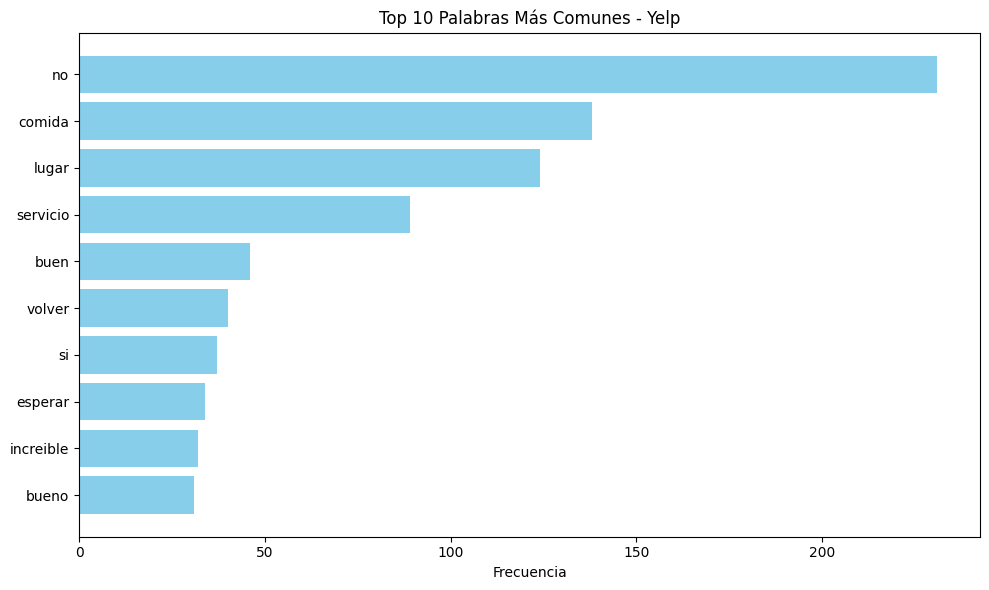

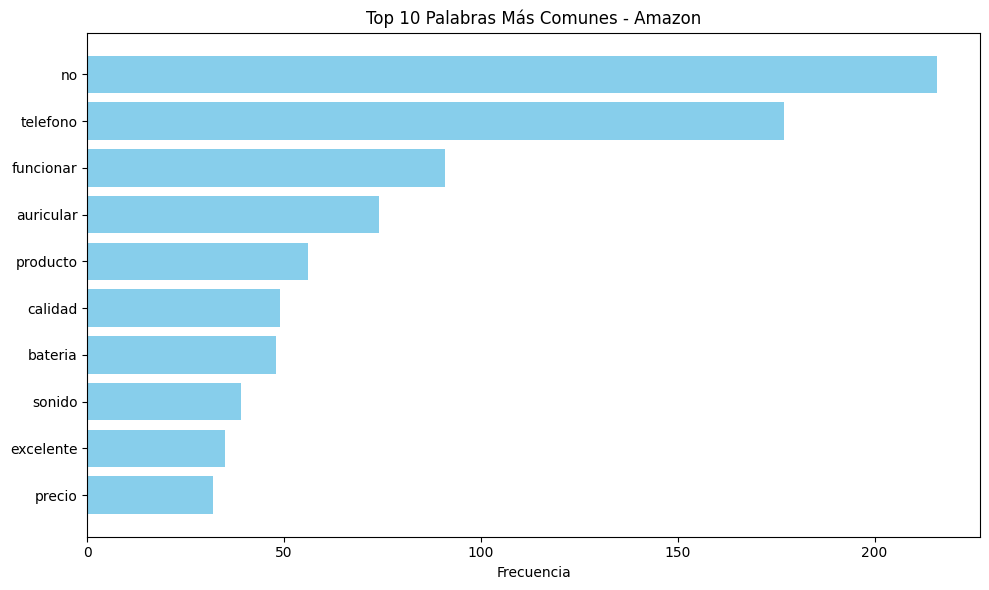

In [13]:
def graficar_palabras_comunes(df, origen, top_n=10):
    # Filtrar y aplanar los lemas
    lemas = [lema for lemas in df[df['Origen'] == origen]['Comentarios_lema'] for lema in lemas]
    conteo = Counter(lemas).most_common(top_n)

    # Separar palabras y frecuencias
    palabras, frecuencias = zip(*conteo)

    # Crear gr√°fico
    plt.figure(figsize=(10, 6))
    plt.barh(palabras, frecuencias, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(f'Top {top_n} Palabras M√°s Comunes - {origen.capitalize()}')
    plt.gca().invert_yaxis()  # Poner la palabra m√°s com√∫n arriba
    plt.tight_layout()
    plt.show()

# Graficar para Yelp
graficar_palabras_comunes(df, 'yelp')

# Graficar para Amazon
graficar_palabras_comunes(df, 'amazon')

### Conteo de bigramas m√°s comunes.

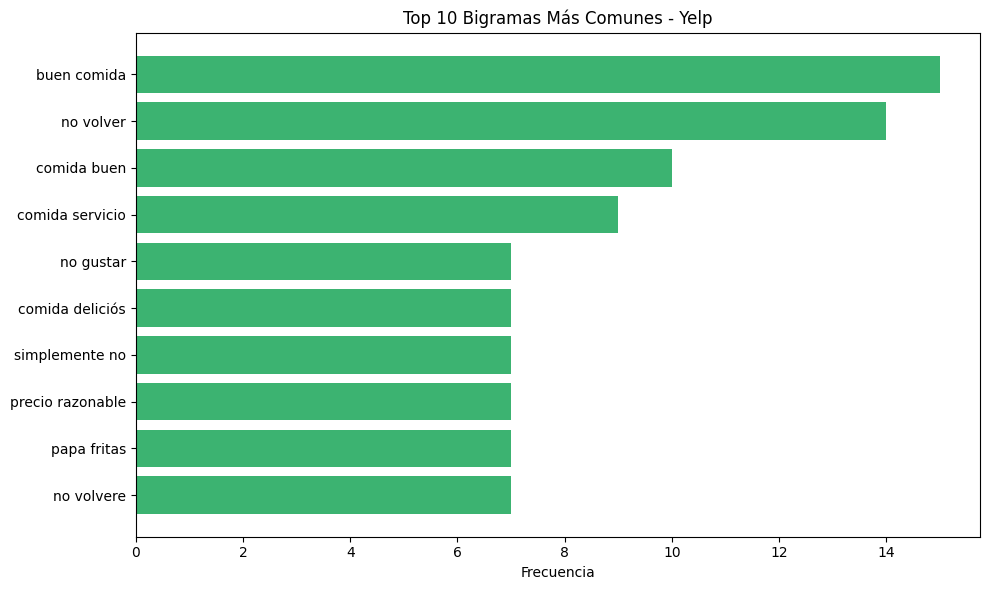

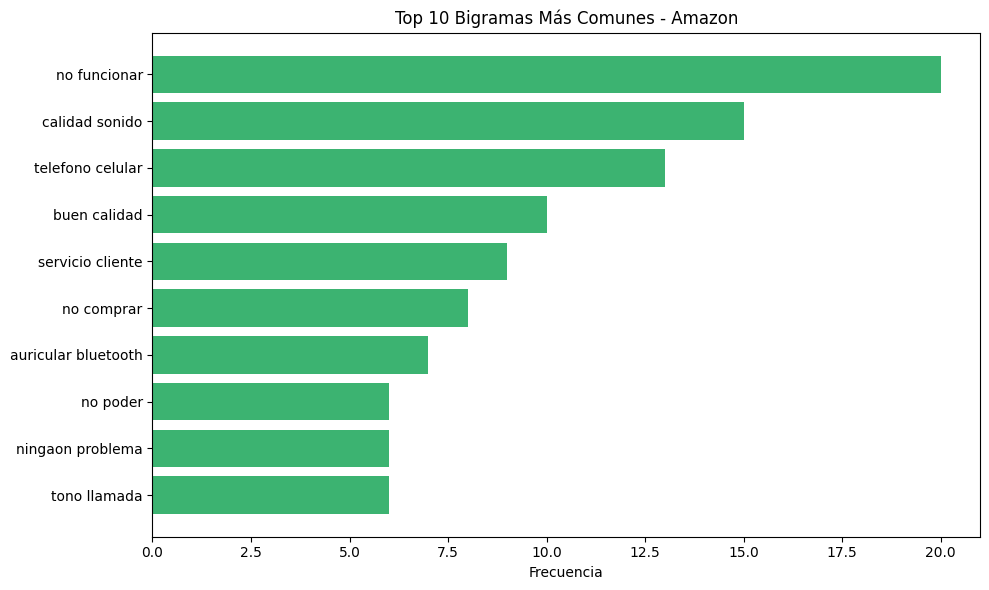

In [14]:
from collections import Counter
from itertools import tee
import matplotlib.pyplot as plt

def generar_bigramas(lista):
    """Devuelve bigramas como tuplas a partir de una lista de palabras"""
    a, b = tee(lista)
    next(b, None)
    return list(zip(a, b))

def graficar_bigramas_comunes(df, origen, top_n=10):
    # Filtrar solo los comentarios del origen y generar bigramas
    bigramas = [
        bigrama
        for lemas in df[df['Origen'] == origen]['Comentarios_lema']
        for bigrama in generar_bigramas(lemas)
    ]

    conteo = Counter(bigramas).most_common(top_n)

    # Convertir tuplas de bigramas a string para graficar
    etiquetas = [' '.join(b) for b, _ in conteo]
    frecuencias = [f for _, f in conteo]

    # Crear gr√°fico
    plt.figure(figsize=(10, 6))
    plt.barh(etiquetas, frecuencias, color='mediumseagreen')
    plt.xlabel('Frecuencia')
    plt.title(f'Top {top_n} Bigramas M√°s Comunes - {origen.capitalize()}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
graficar_bigramas_comunes(df, 'yelp')
graficar_bigramas_comunes(df, 'amazon')


### WordClouds

#### WordCloud Yelp.

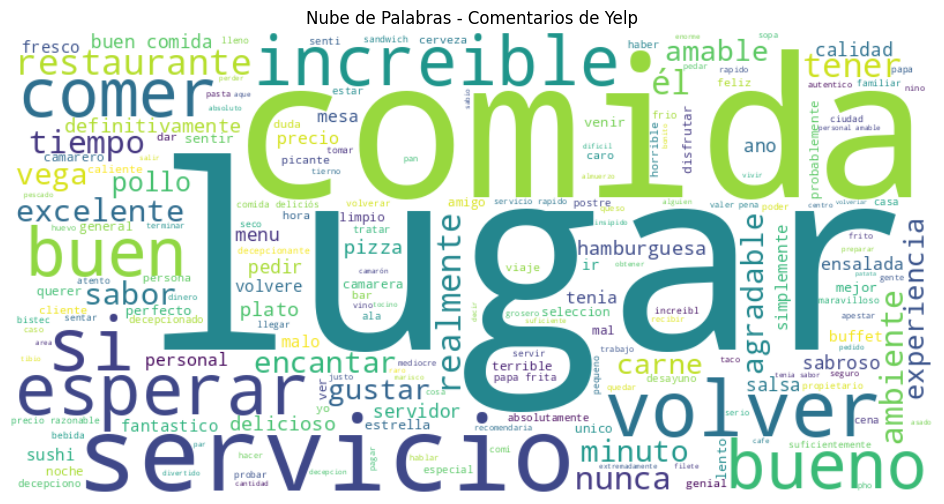

In [15]:
# Filtrar el DataFrame
df_yelp = df[df['Origen'] == 'yelp']

# Unir todos los lemas en un solo string (comentarios lematizados ya est√°n en listas)
texto_yelp = ' '.join([' '.join(lemas) for lemas in df_yelp['Comentarios_lema']])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_yelp)

# Mostrar la nube
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Comentarios de Yelp")
plt.show()

#### WordCloud Amazon.

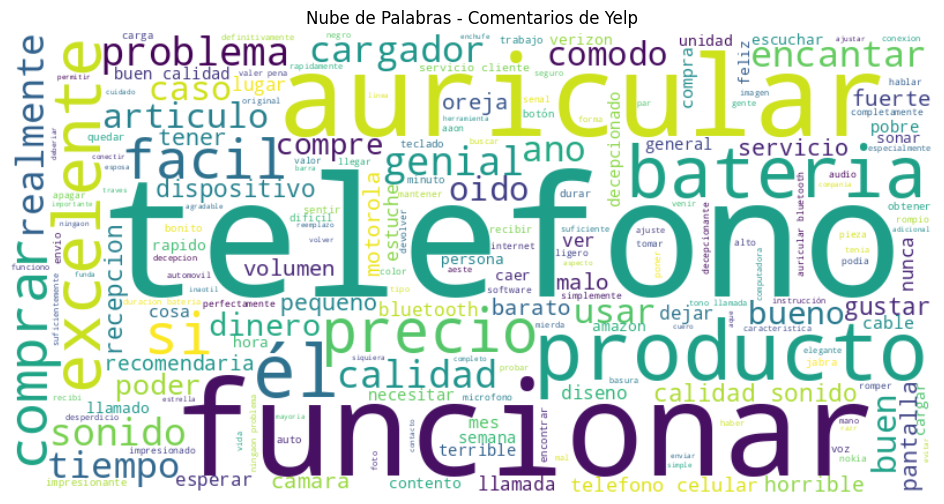

In [16]:
# Filtrar el DataFrame
df_amazon = df[df['Origen'] == 'amazon']

# Unir todos los lemas en un solo string (comentarios lematizados ya est√°n en listas)
texto_amazon = ' '.join([' '.join(lemas) for lemas in df_amazon['Comentarios_lema']])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_amazon)

# Mostrar la nube
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Comentarios de Yelp")
plt.show()


#### WordCloud + Bigramas.

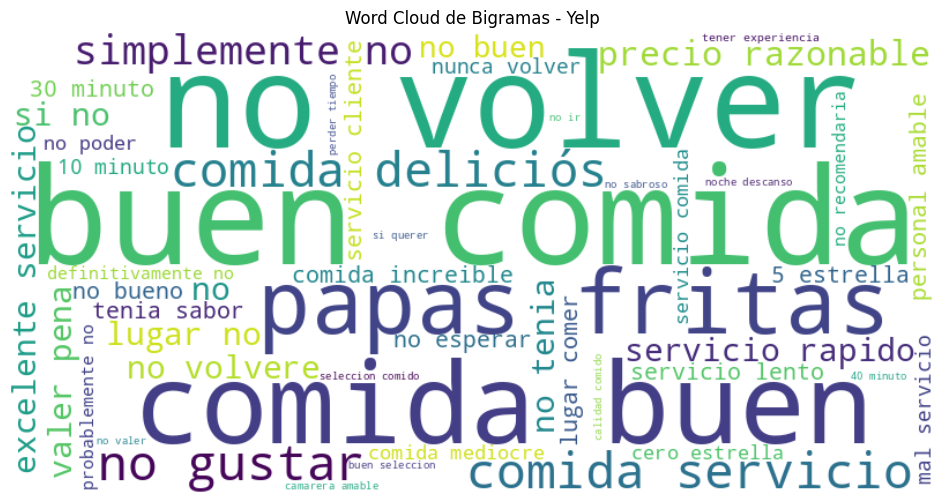

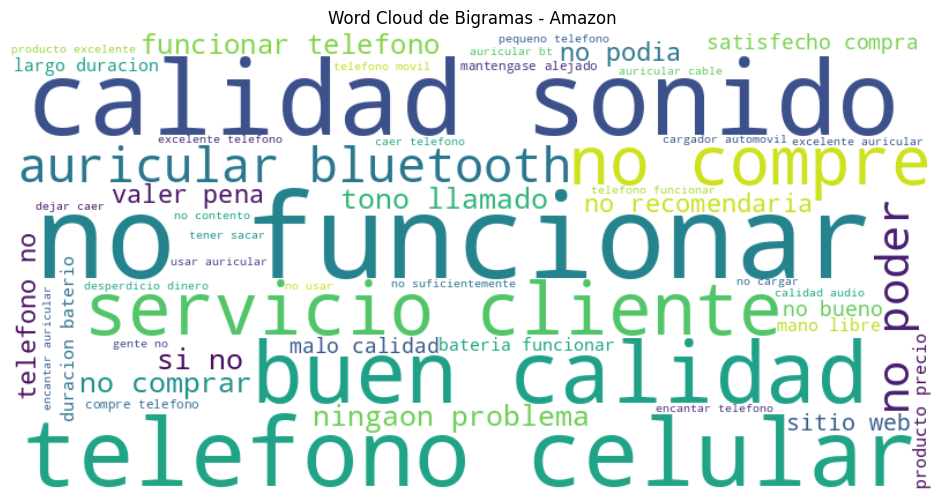

In [17]:
def generar_bigramas_spacy(df, origen, top_n=50):
    """
    Genera bigramas usando spaCy a partir de la columna 'Comentarios_Lema', sin stopwords.
    Luego genera una nube de palabras.
    """
    # Filtrar los comentarios por 'origen' (por ejemplo, 'yelp' o 'amazon')
    comentarios = df[df['Origen'] == origen]['Comentarios_sin_StopWords']

    # Generar bigramas
    bigramas = []
    for comentario in comentarios:
        # Crear un Doc de spaCy a partir de la lista de lemas (de la columna 'Comentarios_Lema')
        doc = nlp(' '.join(comentario))  # Unimos la lista de lemas y lo procesamos con spaCy
        # Extraer bigramas
        for i in range(len(doc) - 1):
            if not doc[i].is_stop and not doc[i+1].is_stop:  # Asegurarse de que no sean stopwords
                bigramas.append((doc[i].lemma_, doc[i+1].lemma_))

    # Contar los bigramas m√°s comunes
    conteo_bigramas = Counter(bigramas).most_common(top_n)

    # Convertir los bigramas a formato texto "palabra1 palabra2"
    bigramas_texto = {' '.join(bigrama): freq for bigrama, freq in conteo_bigramas}

    # Generar la nube de palabras de los bigramas
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigramas_texto)

    # Mostrar la nube
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud de Bigramas - {origen.capitalize()}")
    plt.show()

# Generar la nube de bigramas para Yelp y Amazon
generar_bigramas_spacy(df, 'yelp')
generar_bigramas_spacy(df, 'amazon')

### üöÄ An√°lisis de sentimiento en espa√±ol con pysentimiento

In [18]:
# Crear analizador de sentimientos
analyzer = create_analyzer(task="sentiment", lang="es")

# Aplicar a una columna de texto
df['Sentimiento'] = df['Comentario'].apply(lambda x: analyzer.predict(x).output)
# Sentimiento solo guarda lo predicho (POS, NEU o NEG)

df['Probabilidad'] = df['Comentario'].apply(lambda x: analyzer.predict(x).probas)
#Ese diccionario contiene la probabilidad de cada clase: positivo, neutro, negativo Ejemplo: {'POS': 0.84, 'NEU': 0.10, 'NEG': 0.06}.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

#### üìä  Gr√°fico de barras de frecuencia de sentimientos

<ipython-input-19-8869e27892cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')


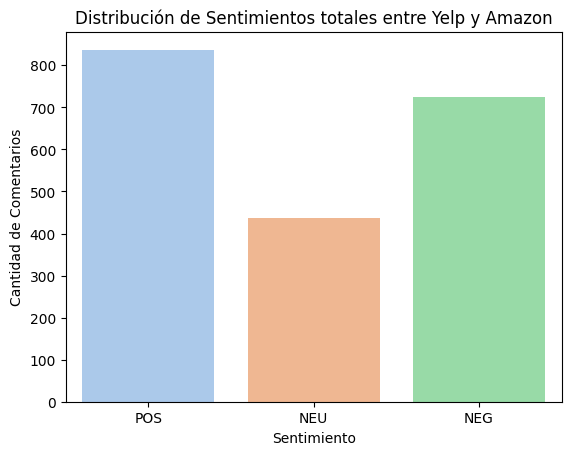

In [19]:
sns.countplot(data=df, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')
plt.title('Distribuci√≥n de Sentimientos totales entre Yelp y Amazon')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()


#### Distribuci√≥n de los sentimientos.

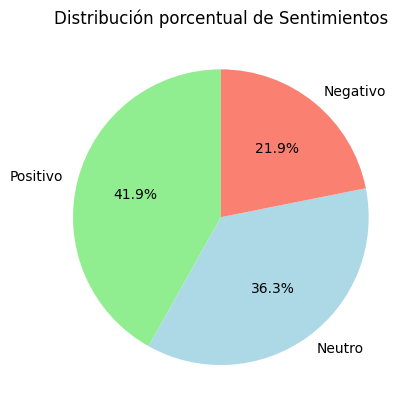

In [20]:
df['Sentimiento'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Positivo', 'Neutro', 'Negativo'],
    colors=['lightgreen', 'lightblue', 'salmon']
)
plt.title('Distribuci√≥n porcentual de Sentimientos')
plt.ylabel('')
plt.show()

#### An√°lisis de Confianza para filtrar comentarios con baja certeza

In [21]:
# M√°xima probabilidad (nivel de certeza del modelo)
df['Confianza'] = df['Probabilidad'].apply(lambda x: max(x.values()))  # En este caso, de la lista {'POS': 0.84, 'NEU': 0.10, 'NEG': 0.06} s√≥lo guarda 0.84 que es el valor mayor

# Filtrar comentarios cuya confianza sea menor a 0.6
comentarios_baja_confianza = df[df['Confianza'] < 0.6]
comentarios_alta_confianza = df[df['Confianza'] >= 0.6]
# Ver los primeros resultados
#comentarios_baja_confianza[['Comentarios', 'Sentimiento', 'Confianza']]

#### Distribuci√≥n de los comentarios filtrados.

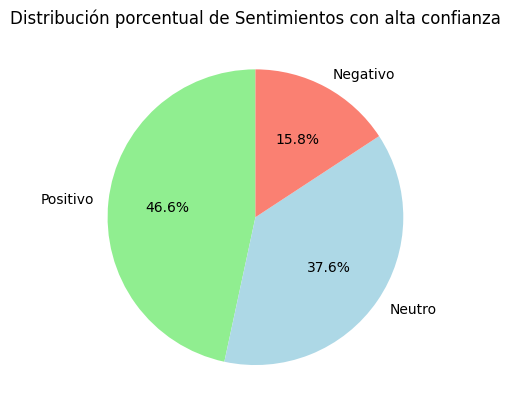

In [22]:
df[df['Confianza'] >= 0.6]['Sentimiento'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Positivo', 'Neutro', 'Negativo'],
    colors=['lightgreen', 'lightblue', 'salmon']
)
plt.title('Distribuci√≥n porcentual de Sentimientos con alta confianza')
plt.ylabel('')
plt.show()

#### Distribuci√≥n de la Confianza de los comentarios.

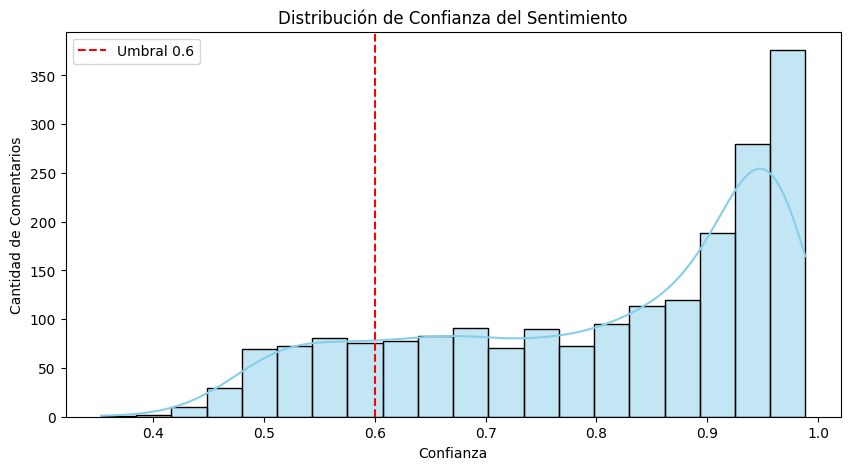

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Confianza', bins=20, kde=True, color='skyblue')
plt.axvline(0.6, color='red', linestyle='--', label='Umbral 0.6')
plt.title('Distribuci√≥n de Confianza del Sentimiento')
plt.xlabel('Confianza')
plt.ylabel('Cantidad de Comentarios')
plt.legend()
plt.show()

# Pruebas de Modelos de Machine Learning.

En este punto, se realizar√° un an√°lisis de texto con el objetivo de predecir una variable num√©rica que nos nidica positvo (para 1) y negativo (para 0), a partir de opiniones o rese√±as escritas por usuarios.


Para convertir los textos en datos num√©ricos que puedan ser procesados por modelos de machine learning, seutilizaran dos t√©cnicas de representaci√≥n de texto:TF-IDF (Term Frequency-Inverse Document Frequency) y Bag of Words (BoW).


TF-IDF pondera la frecuencia de las palabras en cada documento ajust√°ndola seg√∫n su frecuencia inversa en todo el corpus, dando mayor peso a t√©rminos distintivos y reduciendo la influencia de palabras comunes.

Bag of Words representa cada documento como un vector que indica la frecuencia de cada palabra, sin considerar el orden ni la relevancia contextual.

Estos vectores van a ser utilizados como entrada para un modelo de regresi√≥n log√≠stica, que permitir√° predecir la variable objetivo asociada a cada texto, en este caso si los comentarios son positivos o negativos.

Adicionalmente, se incorporar√° un modelo de deep learning utilizando la biblioteca Keras, que aprvechando redes neuronales para capturar patrones m√°s complejos en los textos, incluyendo relaciones contextuales y secuenciales entre palabras que no pueden ser detectadas por las representaciones tradicionales.

Se entrenar√°n y evaluar√°n los tres modelos ‚Äîregresi√≥n lineal con Bag of Words, regresi√≥n lineal con TF-IDF y red neuronal profunda con Keras‚Äî para comparar su desempe√±o predictivo.

La evaluaci√≥n incluir√° m√©tricas adecuadas para regresi√≥n y an√°lisis de generalizaci√≥n, con el fin de identificar cu√°l enfoque es m√°s efectivo para este problema espec√≠fico.

Este an√°lisis permitir√° no solo comparar t√©cnicas cl√°sicas y modernas de procesamiento de texto, sino tambi√©n obtener insights sobre la relevancia y el impacto de las palabras y estructuras en la predicci√≥n, mejorando la comprensi√≥n del comportamiento del modelo y la calidad de las predicciones.

### Divisi√≥n de datos de entrenamiento y prueba.

In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df['Comentario'], df['Valor'], test_size=0.2, random_state=42
)

## Regresi√≥n Log√≠stica.

### Utilizando TF-IFD.

TF-IDF (Term Frequency - Inverse Document Frequency) es una t√©cnica de procesamiento de texto utilizada para evaluar la importancia de una palabra dentro de un conjunto de documentos. Se basa en dos conceptos:

TF (Frecuencia de T√©rmino): Mide cu√°ntas veces aparece un t√©rmino en un documento espec√≠fico, comparado con el n√∫mero total de t√©rminos en ese documento. Esto ayuda a capturar cu√°n relevante es una palabra dentro de un documento en particular.

IDF (Frecuencia Inversa de Documentos): Mide la importancia de una palabra dentro de un conjunto de documentos. Si una palabra aparece en muchos documentos, tiene menos valor. La f√≥rmula es:

Esto ayuda a reducir el peso de las palabras que aparecen frecuentemente en todos los documentos (como "el", "y", "de"), ya que no agregan mucha informaci√≥n.

As√≠, la importancia de un t√©rmino en un documento depende tanto de su frecuencia en ese documento como de cu√°n com√∫n es en todo el conjunto de documentos.

#### C√°lculo de TF-IDF con TfidVetorizer y analisis de n-gramas.

In [25]:
 # TFIDF espera trabajar con strings y  no listas, por lo que se procede a crear una nueva columna con los datos tokenizados en formato str.
df['Comentarios_sin_StopWords_str'] = df['Comentarios_sin_StopWords'].apply(lambda x: ' '.join(x))

# Crear el vectorizador
tfidfvectorizer = TfidfVectorizer(ngram_range=(1,5))
#inlcuyo bigramas y trigramas para que le de contexto a los comentarios. Esto me permite ver un "No conforme" y no solamente le "No" y el "Conforme" por separado.

# Ajustar y transformar
tfidf_matrix = tfidfvectorizer.fit_transform(df['Comentarios_sin_StopWords_str'])

# Obtener los t√©rminos
features = tfidfvectorizer.get_feature_names_out()

# Convertir la matriz a DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=features)

# Sumar TF-IDF por columna
tfidf_scores = df_tfidf.sum().sort_values(ascending=False)

# Mostrar top 10
print("üîù Top 10 n-gramas por score TF-IDF:")
print(tfidf_scores.head(10).round(3))




üîù Top 10 n-gramas por score TF-IDF:
no          50.074
telefono    30.738
servicio    22.610
lugar       21.165
comida      21.084
producto    16.893
funciona    16.562
buena       14.055
calidad     11.482
precio      11.402
dtype: float64


In [26]:
# Crear un DataFrame auxiliar con el tipo de n-grama
df_scores = pd.DataFrame({
    'ngram': tfidf_scores.index,
    'score': tfidf_scores.values,
    'tipo': tfidf_scores.index.to_series().apply(lambda x: f'{len(x.split())}-grama')
})

# Ver los 5 m√°s importantes por tipo
top_n = 5
for tipo in ['1-grama', '2-grama', '3-grama']:
    print(f"\nüîù Top {top_n} {tipo}s:")
    print(df_scores[df_scores['tipo'] == tipo].head(top_n).to_string(index=False))


üîù Top 5 1-gramas:
   ngram     score    tipo
      no 50.074497 1-grama
telefono 30.737920 1-grama
servicio 22.609863 1-grama
   lugar 21.165157 1-grama
  comida 21.084398 1-grama

üîù Top 5 2-gramas:
           ngram    score    tipo
   no volveremos 4.333206 2-grama
      no volvere 4.248984 2-grama
     no funciona 3.923595 2-grama
servicio cliente 3.868002 2-grama
 no recomendaria 3.806411 2-grama

üîù Top 5 3-gramas:
                    ngram    score    tipo
    buena comida servicio 1.494073 3-grama
    no recomendaria lugar 1.215527 3-grama
             no vale pena 1.073442 3-grama
servicio cliente terrible 1.048346 3-grama
       no compre producto 1.031673 3-grama


El an√°lisis de los n-gramas (1, 2 y 3 palabras) revela una fuerte tendencia negativa en los comentarios analizados.

Esto se evidencia principalmente por:

La presencia dominante de la palabra "no" como unigram (1-grama) m√°s relevante, indicando una alta frecuencia de negaciones.

Los bigramas y trigramas refuerzan esta tendencia negativa, con frases como "no volveremos", "no volvere", "no funciona", "no recomendaria", "no vale pena" y "no compre producto", todas las cuales reflejan insatisfacci√≥n o malas experiencias.

Aun as√≠, hay menciones positivas como "buena comida servicio", pero estas son menos frecuentes o tienen menor peso que las negativas.

#### Ajuste de datos de Entrenamiento.

Ajustamos el vectorizador TF-IDF con los datos de entrenamiento y test  transformando esos datos en una matriz num√©rica.

In [27]:
# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
# Transformar los datos de prueba
X_test_tfidf = tfidfvectorizer.transform(X_test)

#### Generaci√≥n y prueba de modelo Regresi√≥n Log√≠stica.

In [28]:
# Crear un modelo de regresi√≥n log√≠stica
# Abajo ten√©s un c√≥digo con los par√°metros expresados de forma que puedas ir modificandolos
model_log_reg = LogisticRegression() #Instanciamos el modelo

# Entrenar el modelo
model_log_reg.fit(X_train_tfidf, y_train) # Fiteamos, es decir, el modelo aprende a partir de los datos de entrenamiento

# Hacer predicciones en el conjunto de prueba
y_pred_log_reg = model_log_reg.predict(X_test_tfidf) # Predecir

#### Evaluaci√≥n del Modelo.

Matriz de Confusi√≥n.

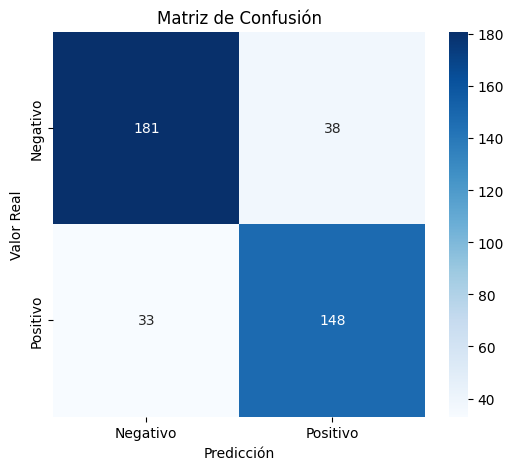

In [29]:
# 1. Matriz de confusi√≥n

# La Matriz de Confusi√≥n es √∫til para Muestra los aciertos y errores del modelo organizados por clase.

cm = confusion_matrix(y_test, y_pred_log_reg)
labels = ['Negativo', 'Positivo']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥n')
plt.show()

üìä Interpretaci√≥n de los resultados:
TP (Verdaderos Positivos) = 148: Casos positivos correctamente clasificados como positivos.

TN (Verdaderos Negativos) = 181: Casos negativos correctamente clasificados como negativos.

FP (Falsos Positivos) = 28: Casos negativos mal clasificados como positivos.

FN (Falsos Negativos) = 33: Casos positivos mal clasificados como negativos.

La matriz de confusi√≥n muestra un buen desempe√±o del modelo:
- 181 verdaderos negativos y 148 verdaderos positivos indican una buena capacidad para clasificar correctamente ambas clases.
- Sin embargo, hay 28 falsos positivos y 33 falsos negativos, lo que sugiere que el modelo comete algunos errores, especialmente en la identificaci√≥n de la clase positiva.
- Estos errores podr√≠an ser relevantes dependiendo del contexto del problema (por ejemplo, si detectar positivos es cr√≠tico).

Curva ROC AUC.

El ROC AUC (Receiver Operating Characteristic - Area Under Curve) es una m√©trica que mide la capacidad del modelo para distinguir entre clases (positiva y negativa), evaluando todas las combinaciones posibles de umbrales de clasificaci√≥n.

ROC: Es una curva que grafica la tasa de verdaderos positivos (TPR) contra la tasa de falsos positivos (FPR) a distintos umbrales.

AUC (Area Under Curve): Es el √°rea bajo esa curva, y su valor va de 0 a 1:

1.0 = modelo perfecto.

0.5 = modelo sin capacidad de clasificaci√≥n (como adivinar).

< 0.5 = peor que adivinar (clasifica al rev√©s).

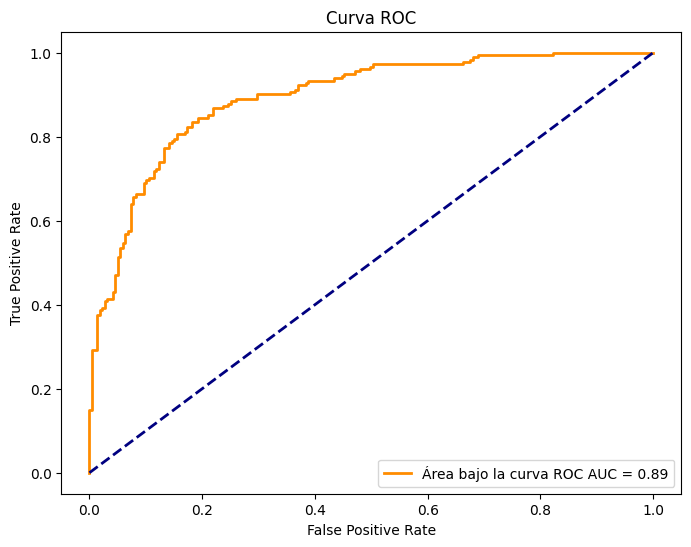

In [30]:
# 2. Curva ROC
fpr, tpr, _ = roc_curve(y_test, model_log_reg.decision_function(X_test_tfidf))
roc_auc = roc_auc_score(y_test, model_log_reg.decision_function(X_test_tfidf))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'√Årea bajo la curva ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

üìà Interpretaci√≥n de tu resultado (AUC = 0.89):
El valor 0.89 indica que el modelo tiene una alta capacidad para distinguir entre clases.

En promedio, hay un 89% de probabilidad de que el modelo asigne un mayor score a una instancia positiva que a una negativa.

Este resultado sugiere que el modelo est√° haciendo un buen trabajo, incluso si a√∫n hay algunos falsos positivos o falsos negativos.

M√©tricas de Predicci√≥n.

- Accuracy:Para medir qu√© tan bien predice el modelo en datos nuevos (exactitud).
Accuracy mide el porcentaje total de predicciones correctas sobre el total de casos.
- Precision: Para medir el costo de un falso positivo es alto (por ejemplo, recomendar una pel√≠cula mala como buena).
Precision mide qu√© proporci√≥n de las predicciones positivas hechas por el modelo son realmente positivas.
- Recall: Para medir cu√°ntos de los casos positivos reales fueron capturados por el modelo.
- f1 Score: Para medir el promedio arm√≥nico entre precisi√≥n y recall. Un buen balance si ambas cosas son importantes.

In [31]:
# 3. M√©tricas
# Accuracy:Para medir qu√© tan bien predice el modelo en datos nuevos (exactitud).
# Accuracy mide el porcentaje total de predicciones correctas sobre el total de casos.
accuracy = accuracy_score(y_test, y_pred_log_reg)
# Precision: Para medir el costo de un falso positivo es alto (por ejemplo, recomendar una pel√≠cula mala como buena).
# Precision mide qu√© proporci√≥n de las predicciones positivas hechas por el modelo son realmente positivas.
precision = precision_score(y_test, y_pred_log_reg)
# Recall: Para medir cu√°ntos de los casos positivos reales fueron capturados por el modelo.
recall = recall_score(y_test, y_pred_log_reg)
#
f1 = f1_score(y_test, y_pred_log_reg)

print("M√©tricas de desempe√±o del modelo:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

M√©tricas de desempe√±o del modelo:
Accuracy : 0.82
Precision: 0.80
Recall   : 0.82
F1 Score : 0.81


Resultados:

- Accuracy = 0.82
El 82% de todas las predicciones (positivas y negativas) fueron correctas. Es una medida general del rendimiento.
Sin embargo, puede ser enga√±osa si las clases est√°n desbalanceadas.

- Precision = 0.80
De todas las predicciones positivas que hizo el modelo, el 80% fueron realmente positivas.
Es importante si queremos minimizar falsos positivos (por ejemplo, evitar alarmas innecesarias).

- Recall = 0.82
El modelo identific√≥ correctamente el 82% de todos los casos realmente positivos.
Es importante si queremos minimizar falsos negativos (por ejemplo, no dejar pasar casos positivos importantes).

- F1 Score = 0.81
Es el promedio arm√≥nico entre precision y recall. Resume el equilibrio entre ambos.
 Un F1 de 0.81 indica un buen balance entre identificar positivos y no equivocarse al predecirlos.


*Validaci√≥n Cruzada.*

La validaci√≥n cruzada es una t√©cnica para evaluar la capacidad de generalizaci√≥n de un modelo. Consiste en:

Dividir los datos en k partes (folds).

Entrenar el modelo con k-1 partes y validar con la parte restante.

Repetir esto k veces, cambiando el fold de validaci√≥n en cada iteraci√≥n.

Calcular el promedio de las m√©tricas obtenidas en cada iteraci√≥n.

Esto reduce el riesgo de que el modelo est√© sobreajustado (overfitting) a una √∫nica partici√≥n de los datos.

In [32]:
# Pipeline que junta vectorizador y modelo
pipeline = make_pipeline(
    TfidfVectorizer(max_features=5000),
    LogisticRegression()
)

# Validaci√≥n cruzada con 5 particiones (k-fold = 5)
scores = cross_val_score(pipeline, df['Comentario'], df['Valor'], cv=5, scoring='accuracy')

# Resultados
print(f"Precisi√≥n media con validaci√≥n cruzada: {scores.mean():.3f}")
print(f"Desviaci√≥n est√°ndar: {scores.std():.3f}")

Precisi√≥n media con validaci√≥n cruzada: 0.807
Desviaci√≥n est√°ndar: 0.018


Resultados de la validaci√≥n cruzada:

La precisi√≥n media del modelo es 0.807, lo que indica que, en promedio, el modelo acierta con un 80.7% de efectividad
en los distintos subconjuntos del conjunto de datos evaluados.

La desviaci√≥n est√°ndar es 0.018, lo que significa que el desempe√±o del modelo es bastante consistente entre los diferentes folds.
Es decir, no hay una gran variaci√≥n en la precisi√≥n dependiendo del conjunto de entrenamiento/validaci√≥n utilizado.
Estos resultados sugieren que el modelo tiene un buen rendimiento general y una buena capacidad de generalizaci√≥n.

Visualizaci√≥n de palabras asociadas a rese√±as positivas y negativas.

Esta visualizaci√≥n permite identificar las palabras m√°s frecuentes o relevantes en cada grupo de rese√±as, separando aquellas asociadas con opiniones positivas de las relacionadas con opiniones negativas.

Al analizar estas palabras clave, podemos entender mejor qu√© aspectos del producto o servicio generan satisfacci√≥n o insatisfacci√≥n en los usuarios.

Este tipo de an√°lisis ayuda a extraer insights cualitativos que complementan las m√©tricas cuantitativas, y es muy √∫til para mejorar la experiencia del cliente y orientar acciones espec√≠ficas de mejora.

In [33]:
# Obtenemos las palabras del vocabulario
palabras = tfidfvectorizer.get_feature_names_out()

# Coeficientes del modelo (uno por palabra)
coeficientes = model_log_reg.coef_[0]

# Creamos un DataFrame para visualizarlo
df_coef = pd.DataFrame({'palabra': palabras, 'coeficiente': coeficientes})

# Ordenamos por importancia
df_coef = df_coef.sort_values(by='coeficiente', ascending=False)

# En la primera columna veremos el n√∫mero "√≠ndice" de cada palabra seg√∫n el √≥rden en que fueron procesadas en el modelo.

# Mostramos las 10 palabras m√°s asociadas a valoraci√≥n positiva y negativa
print("üîº Palabras m√°s asociadas a rese√±as positivas:")
print(df_coef.head(10))

print("\nüîΩ Palabras m√°s asociadas a rese√±as negativas:")
print(df_coef.tail(10))

üîº Palabras m√°s asociadas a rese√±as positivas:
         palabra  coeficiente
19666       gran     2.652094
3455        buen     1.947873
17866  excelente     1.903779
27629        muy     1.677747
2959        bien     1.572698
3549       buena     1.352007
19086   funciona     1.311803
21523  incre√≠ble     1.307181
15119         es     1.260216
19484     genial     1.165134

üîΩ Palabras m√°s asociadas a rese√±as negativas:
             palabra  coeficiente
32591          pobre    -0.958729
11277         dinero    -1.046398
10008  decepcionante    -1.090290
41723       terrible    -1.117921
16414         estaba    -1.156037
21104       horrible    -1.160473
34367            que    -1.229001
9992    decepcionado    -1.426818
25445           mala    -1.471687
28614             no    -4.650758


Las palabras con coeficientes positivos m√°s altos, como "gran", "buen", "excelente", "funciona" y "incre√≠ble", est√°n fuertemente asociadas con rese√±as positivas, reflejando satisfacci√≥n, calidad y buen desempe√±o del producto o servicio.

En contraste, las palabras con coeficientes negativos m√°s fuertes, como "no", "mala", "decepcionado", "horrible" y "terrible", se asocian claramente con rese√±as negativas, indicando insatisfacci√≥n, problemas y decepci√≥n por parte de los usuarios.

Esto muestra que el modelo ha identificado correctamente los t√©rminos que expresan opiniones positivas y negativas, lo que facilita la interpretaci√≥n y el an√°lisis cualitativo del sentimiento en los textos.

Graficar las 10 palabras m√°s positivas y m√°s negativas

<ipython-input-34-b0ca5afc65f8>:36: UserWarning: Glyph 128316 (\N{UP-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-34-b0ca5afc65f8>:36: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128316 (\N{UP-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


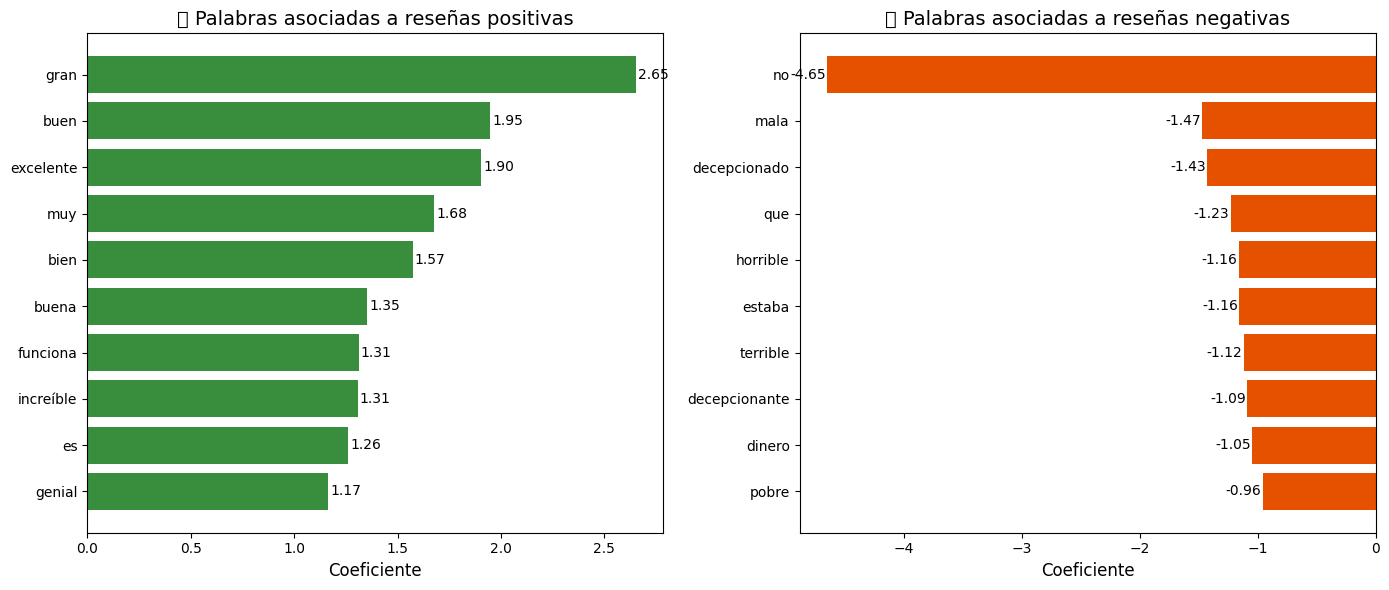

In [34]:
# Colores pastel suaves (m√°s apagados)
color_positivas = '#388e3c'  # verde claro apagado
color_negativas = '#e65100'  # rojo claro apagado

# Top 10 positivas y negativas
top_positivas = df_coef.head(10)
top_negativas = df_coef.tail(10).sort_values(by='coeficiente')

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gr√°fico de palabras positivas
bars1 = ax[0].barh(top_positivas['palabra'], top_positivas['coeficiente'], color=color_positivas)
ax[0].set_title('üîº Palabras asociadas a rese√±as positivas', fontsize=14)
ax[0].invert_yaxis()
ax[0].set_xlabel('Coeficiente', fontsize=12)

# Agregar valores al final de las barras (positivas)
for bar in bars1:
    width = bar.get_width()
    ax[0].text(width + 0.01, bar.get_y() + bar.get_height() / 2,
               f'{width:.2f}', va='center', fontsize=10)

# Gr√°fico de palabras negativas
bars2 = ax[1].barh(top_negativas['palabra'], top_negativas['coeficiente'], color=color_negativas)
ax[1].set_title('üîΩ Palabras asociadas a rese√±as negativas', fontsize=14)
ax[1].invert_yaxis()
ax[1].set_xlabel('Coeficiente', fontsize=12)

# Agregar valores al final de las barras (negativas)
for bar in bars2:
    width = bar.get_width()
    ax[1].text(width - 0.01, bar.get_y() + bar.get_height() / 2,
               f'{width:.2f}', va='center', ha='right', fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-35-94115b775b5c>:23: UserWarning: Glyph 128316 (\N{UP-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-94115b775b5c>:23: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128316 (\N{UP-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128317 (\N{DOWN-POINTING SMALL RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


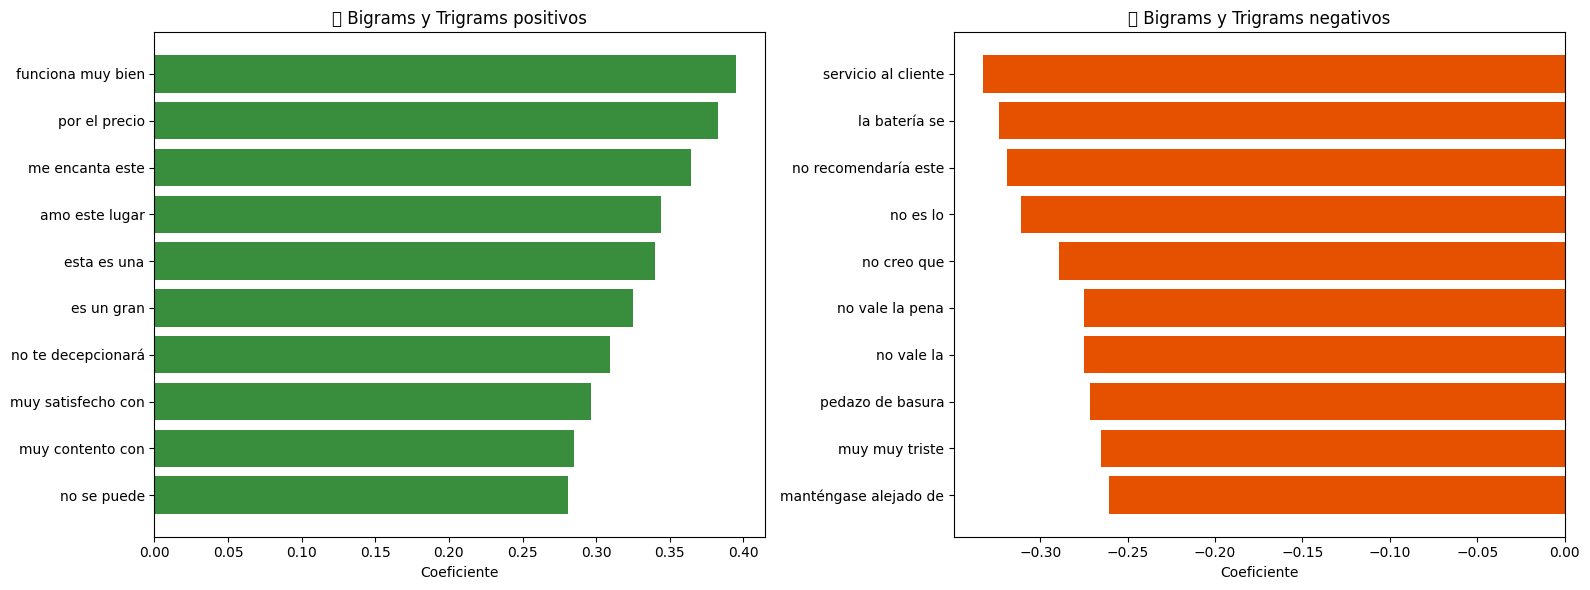

In [35]:
# Filtrar bigramas y trigramas
# Cambiar 'ngrama' a 'palabra' para acceder a la columna correcta
df_bi_tri = df_coef[df_coef['palabra'].str.count(' ') >= 2]

top_pos_bi_tri = df_bi_tri.sort_values('coeficiente', ascending=False).head(10)
top_neg_bi_tri = df_bi_tri.sort_values('coeficiente', ascending=True).head(10)

color_positivas = '#388e3c'  # verde oscuro
color_negativas = '#e65100'  # naranja oscuro

fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].barh(top_pos_bi_tri['palabra'], top_pos_bi_tri['coeficiente'], color=color_positivas) # Cambiar 'ngrama' a 'palabra'
axes[0].invert_yaxis()
axes[0].set_title('üîº Bigrams y Trigrams positivos')
axes[0].set_xlabel('Coeficiente')

axes[1].barh(top_neg_bi_tri['palabra'], top_neg_bi_tri['coeficiente'], color=color_negativas) # Cambiar 'ngrama' a 'palabra'
axes[1].invert_yaxis()
axes[1].set_title('üîΩ Bigrams y Trigrams negativos')
axes[1].set_xlabel('Coeficiente')

plt.tight_layout()
plt.show()


üß† ¬øQu√© muestran los gr√°ficos?
Las palabras con coeficientes positivos son las que m√°s contribuyen a que el modelo prediga una rese√±a positiva.

Las palabras con coeficientes negativos son las que m√°s empujan al modelo hacia una predicci√≥n negativa.

Prueba del modelo.

Se genera un c√≥digo para probar distintas frases con comentarios genericos con el motivo de evaluar la funcionalidad del modelo de predicci√≥n.

In [36]:
nueva_rese√±a = "no lo recominedo"  # Reemplaza con la rese√±a que deseas probar
nueva_rese√±a_tfidf = tfidfvectorizer.transform([nueva_rese√±a])
prediccion = model_log_reg.predict(nueva_rese√±a_tfidf)
# Obtener la probabilidad de la predicci√≥n
probabilidadpositiva = model_log_reg.predict_proba(nueva_rese√±a_tfidf)

# Obtener la probabilidad en la clase predicha (0 o 1)
probabilidad = probabilidadpositiva[0][1]  # Probabilidad de la clase "positivo"

print(f"Se predice que la cr√≠tica es de caracter {prediccion[0]}")
print(f" con una probabilidad de que sea positiva de {probabilidad:.2f}")

Se predice que la cr√≠tica es de caracter 0
 con una probabilidad de que sea positiva de 0.09


### Utilizando Bag of Words.

BoW convierte un conjunto de documentos en una matriz de ocurrencias de palabras. A diferencia de TF-IDF, que pondera las palabras seg√∫n su frecuencia e importancia en relaci√≥n con todo el corpus, BoW solo cuenta cu√°ntas veces aparece una palabra en un documento sin considerar la frecuencia global de la palabra.

#### Ajuste de datos de entrenamiento para BoW.

In [37]:
# Instanciamos el vectorizador BoW
vectorizer_bow = CountVectorizer()

# Aplicamos el vectorizador a los comentarios lematizados (ahora en formato string)
vector_bow = vectorizer_bow.fit_transform(df['Comentarios_sin_StopWords_str'])

# Convertimos la matriz de caracter√≠sticas en un DataFrame para visualizar
bow_df = pd.DataFrame(vector_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

# Obtener los nombres de las caracter√≠sticas (palabras)
features_bow = vectorizer_bow.get_feature_names_out()


# Crear un DataFrame con las frecuencias de las palabras
df_bow = pd.DataFrame(vector_bow.toarray(), columns=features_bow)

In [38]:
# Ajustar y transformar los datos de entrenamiento
X_train_bow = vectorizer_bow.fit_transform(X_train)
# Transformar los datos de prueba
X_test_bow  = X_test_bow  = vectorizer_bow.transform(X_test)

Generaci√≥n y prueba del Modelo con BoW.

In [39]:
# Crear un modelo de regresi√≥n log√≠stica
# Abajo ten√©s un c√≥digo con los par√°metros expresados de forma que puedas ir modificandolos
model_log_reg_Bow = LogisticRegression() #Instanciamos el modelo

# Entrenar el modelo
model_log_reg_Bow.fit(X_train_bow, y_train) # Fiteamos, es decir, el modelo aprende a partir de los datos de entrenamiento

# Hacer predicciones en el conjunto de prueba
y_pred_log_reg_Bow = model_log_reg_Bow.predict(X_test_bow) # Predecir

#### Evaluaci√≥n del Modelo.


Matriz de Confusi√≥n.

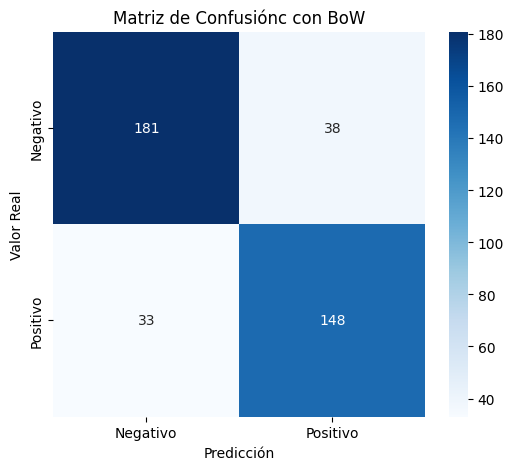

In [40]:
# 1. Matriz de confusi√≥n

# La Matriz de Confusi√≥n es √∫til para Muestra los aciertos y errores del modelo organizados por clase.

cm1 = confusion_matrix(y_test, y_pred_log_reg_Bow)
labels = ['Negativo', 'Positivo']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥nc con BoW')
plt.show()

Curva ROC AUC.

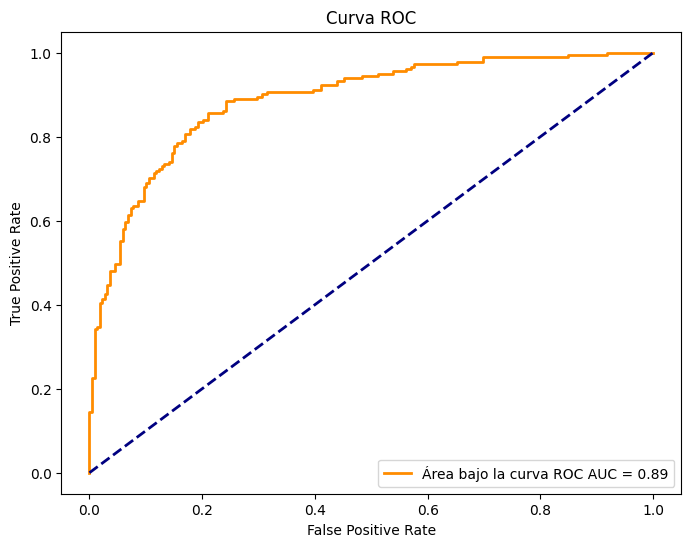

In [41]:
# 2. Curva ROC
# ROC AUC SCORE eval√∫a qu√© tan bien el modelo separa las clases.
fpr1, tpr1, _ = roc_curve(y_test, model_log_reg_Bow.decision_function(X_test_bow))
roc_auc1 = roc_auc_score(y_test, model_log_reg_Bow.decision_function(X_test_bow))

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'√Årea bajo la curva ROC AUC = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

M√©tricas de Predicci√≥n.

In [42]:
# 3. M√©tricas
# Accuracy:Para medir qu√© tan bien predice el modelo en datos nuevos (exactitud).
# Accuracy mide el porcentaje total de predicciones correctas sobre el total de casos.
accuracy = accuracy_score(y_test, y_pred_log_reg)
# Precision: Para medir el costo de un falso positivo es alto (por ejemplo, recomendar una pel√≠cula mala como buena).
# Precision mide qu√© proporci√≥n de las predicciones positivas hechas por el modelo son realmente positivas.
precision = precision_score(y_test, y_pred_log_reg)
# Recall: Para medir cu√°ntos de los casos positivos reales fueron capturados por el modelo.
recall = recall_score(y_test, y_pred_log_reg)
# f1 Score: Para medir el promedio arm√≥nico entre precisi√≥n y recall. Un buen balance si ambas cosas son importantes.
f1 = f1_score(y_test, y_pred_log_reg)

print("M√©tricas de desempe√±o del modelo:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

M√©tricas de desempe√±o del modelo:
Accuracy : 0.82
Precision: 0.80
Recall   : 0.82
F1 Score : 0.81


Validaci√≥n Cruzada con BoW.

In [43]:
# Pipeline con Bag of Words y Regresi√≥n Log√≠stica
pipeline1 = make_pipeline(
    CountVectorizer(max_features=5000),  # Bag of Words
    LogisticRegression()
)

# Validaci√≥n cruzada con 5 particiones
scores = cross_val_score(pipeline1, df['Comentario'], df['Valor'], cv=5, scoring='accuracy')

# Resultados
print(f"Precisi√≥n media con validaci√≥n cruzada (BoW): {scores.mean():.3f}")
print(f"Desviaci√≥n est√°ndar: {scores.std():.3f}")

Precisi√≥n media con validaci√≥n cruzada (BoW): 0.811
Desviaci√≥n est√°ndar: 0.016


## Redes Neuronales.

### Prueba de Modelo con Keras.

In [44]:
# Vectorizar los textos
vectorizer_Neuro = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer_Neuro.fit_transform(df['Comentarios_sin_StopWords_str']).toarray()

In [45]:
# Variable objetivo
y = df['Valor'].values  # Asegurate que sea 0 y 1

In [46]:
# Dividir en train y test (estratificado)
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [47]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train1.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # 1 neurona y activaci√≥n sigmoid para binario

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',   # funci√≥n para binaria
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Mostramos el resumen del modelo: esto nos dar√° detalles sobre cada capa y el n√∫mero de par√°metros entrenables en el modelo.
model.summary()

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense (Dense)                   ‚îÇ (None, 128)            ‚îÇ     1,280,128 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,288,449 (4.92 MB)

 Trainable params: 1,288,449 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Use X_train1 and y_train1 which were specifically prepared for the neural network
history = model.fit(X_train1, y_train1,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=10,
                    callbacks=[early_stop])

Epoch 1/100
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 23ms/step - accuracy: 0.5144 - loss: 0.6905 - val_accuracy: 0.6375 - val_loss: 0.6480
Epoch 2/100
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 16ms/step - accuracy: 0.7966 - loss: 0.5095 - val_accuracy: 0.7750 - val_loss: 0.4780
Epoch 3/100
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 16ms/step - accuracy: 0.9603 - loss: 0.1378 - val_accuracy: 0.7900 - val_loss: 0.4914
Epoch 4/100
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 16ms/step - accuracy: 0.9860 - loss: 0.0459 - val_accuracy: 0.7725 - val_loss: 0.5345
Epoch 5/100
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 19ms/step - accuracy: 0.9908 - loss: 0.0229 - val_accuracy: 0.7700 - val_loss: 0.5655
Epoch 6/100
160/160 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 16ms/step - accuracy: 0.9947 - loss: 0.0099 - val_accuracy: 0.7700

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_val) > 0.5).astype("int32")

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

13/13 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step
[[173  27]
 [ 63 137]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       200
           1       0.84      0.69      0.75       200

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.78      0.77       400



üìä Gr√°fico de Accuracy y Loss por √âpoca

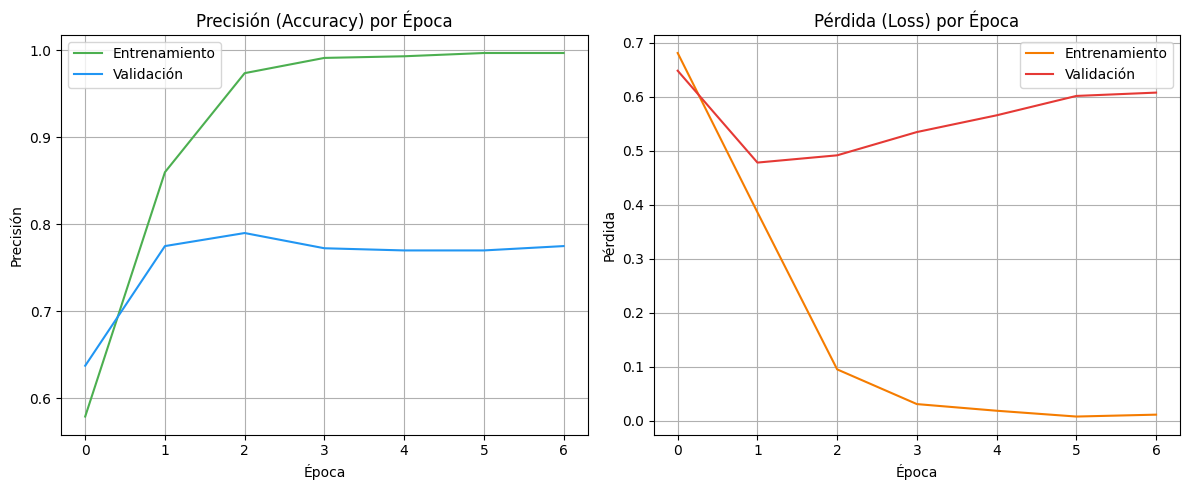

In [51]:
# Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento', color='#4caf50')
plt.plot(history.history['val_accuracy'], label='Validaci√≥n', color='#2196f3')
plt.title('Precisi√≥n (Accuracy) por √âpoca')
plt.xlabel('√âpoca')
plt.ylabel('Precisi√≥n')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento', color='#f57c00')
plt.plot(history.history['val_loss'], label='Validaci√≥n', color='#e53935')
plt.title('P√©rdida (Loss) por √âpoca')
plt.xlabel('√âpoca')
plt.ylabel('P√©rdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [52]:
loss, accuracy = model.evaluate(X_train1, y_train1, verbose=False)
print("Precisi√≥n Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Precisi√≥n Prueba:  {:.4f}".format(accuracy))


Precisi√≥n Entrenamiento: 0.9781
Precisi√≥n Prueba:  0.7750


Evaluaci√≥n del modelo.

**El modelo tiene overfitting**

Si hay sobreajuste (overfitting), el modelo aprende demasiado bien los datos de entrenamiento, pero falla al generalizar en los datos nuevos (de validaci√≥n o test).

üìà ¬øQu√© es accuracy?
Accuracy (precisi√≥n) mide el porcentaje de predicciones correctas que hace tu modelo.

Se suele graficar en funci√≥n de las √©pocas (cada ciclo completo de entrenamiento con todos los datos).

‚úÖ Interpretaci√≥n:
Si la accuracy de entrenamiento y validaci√≥n suben juntas, el modelo est√° aprendiendo bien.

Si la accuracy de entrenamiento sube pero la de validaci√≥n se estanca o baja, puede estar sobreajustando (overfitting).

üìâ ¬øQu√© es loss?
Loss es una medida del error que comete el modelo (por ejemplo, la entrop√≠a cruzada en clasificaci√≥n).

El objetivo es minimizar la p√©rdida durante el entrenamiento.

‚úÖ Interpretaci√≥n:
Una loss que disminuye tanto en entrenamiento como validaci√≥n = buen aprendizaje.

Si loss en validaci√≥n sube mientras la de entrenamiento baja = probable sobreajuste.

In [53]:
# Paso 1: Seleccionar una rese√±a real del DataFrame
indice = 1000  # Cambi√° este n√∫mero si quer√©s ver otra rese√±a

oracion_real = df['Comentario'].iloc[indice]
valoracion_real = df['Valor'].iloc[indice]

# --- CAMBIO AQU√ç: Usar el mismo TF-IDF Vectorizer usado para entrenar la Red Neuronal ---
# Asumiendo que 'vectorizer_Neuro' es el TfidfVectorizer utilizado para crear X_train1 y X_val
# Es crucial que sea la *misma* instancia que fue fit_transformed en los datos de entrenamiento
# Si no es la misma instancia, o si X_train1/X_val fueron creados con otro vectorizador, ajusta esto.
# Basado en el c√≥digo anterior, parece que vectorizer_Neuro fue usado justo antes de dividir X, y.
# Aseg√∫rate de que la celda donde se define vectorizer_Neuro se ejecuta antes que esta.
nueva_rese√±a_vectorizada = vectorizer_Neuro.transform([oracion_real])

# Paso 4: Predecir con el modelo
# La predicci√≥n espera un tensor, y .transform() de TfidfVectorizer devuelve una matriz dispersa.
# Necesitamos convertirla a un array denso si el modelo Sequential fue construido para aceptar entradas densas
# como lo sugiere el error con Dense(input_shape=(X_train1.shape[1],)).
# Asumiendo que X_train1 fue .toarray() despu√©s de TF-IDF.
nueva_rese√±a_vectorizada_dense = nueva_rese√±a_vectorizada.toarray()

prediccion = model.predict(nueva_rese√±a_vectorizada_dense)

# Paso 5: Convertir la probabilidad a clase 0 o 1
valoracion_predicha = 1 if prediccion[0][0] >= 0.5 else 0

# Paso 6: Mostrar resultados
print(f"Rese√±a: {oracion_real}")
print(f"Valoraci√≥n real: {valoracion_real}")
print(f"Valoraci√≥n predicha: {valoracion_predicha}")
print(f"Probabilidad predicha: {prediccion[0][0]:.4f}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
Rese√±a: Buen caso, excelente valor.
Valoraci√≥n real: 1
Valoraci√≥n predicha: 1
Probabilidad predicha: 0.9889


In [54]:
# Testeamos con nuevas oraciones

# Definir una nueva oraci√≥n para predecir.
nueva_oracion = ["si es fatal"]

nueva_secuencia_vectorizada = vectorizer_Neuro.transform(nueva_oracion)

# Convertir a array denso si el modelo lo espera
nueva_secuencia_vectorizada_dense = nueva_secuencia_vectorizada.toarray()


# Usar el modelo para predecir la valoraci√≥n (0 o 1)

prediccion = model.predict(nueva_secuencia_vectorizada_dense)

print(f"Predicci√≥n: {prediccion[0][0]}")
valoracion = 1 if prediccion[0][0] >= 0.5 else 0
print(f"Valoraci√≥n predicha: {valoracion}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
Predicci√≥n: 0.030454441905021667
Valoraci√≥n predicha: 0


In [55]:
# X ahora contiene un array de secuencias num√©ricas (en formato tensor o matriz), en las que cada n√∫mero representa un √≠ndice de palabra del vocabulario.
# Estas secuencias est√°n ajustadas para tener la misma longitud (max_len=100), con las m√°s largas recortadas y las m√°s cortas rellenadas con ceros.
# Visualizamos el tipo de dato que es X
print(type(X))

print(X)

<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### üì¶ Tuning con Keras Tuner para clasificaci√≥n de sentimientos

Aprovechando X_train1, X_val, y_train1, y_val  utilizadas en la primer pureba con Keras, utilizamos las mismas variables paa buscar los mejores hiperpar√°metros.

#### 1. PADDEAR

In [56]:
#Los modelos de tf.keras esperan que todas las secuencias de entrada tengan la misma longitud
#para poder agruparlas en una matriz (tensor) y procesarlas por lotes.

# Define the maximum length for padding sequences
max_len = 1000
X_train_pad = pad_sequences(X_train1, maxlen=max_len)
X_val_pad = pad_sequences(X_val, maxlen=max_len)

#### üéØ 2. Definir funci√≥n para el modelo a tunear


In [57]:
def build_model(hp):
    model = Sequential()

    model.add(Embedding(
        input_dim=max_words + 1,
        output_dim=hp.Choice("embedding_dim", [32, 64, 128]),
        input_length=max_len
    ))

    model.add(Bidirectional(SimpleRNN(
        units=hp.Int("rnn_units", min_value=16, max_value=64, step=16)
    )))

    model.add(Dropout(hp.Choice("dropout_rate", [0.2, 0.3, 0.5])))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        optimizer=Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

#### üîç 3. Inicializar Keras Tuner



In [58]:
# Define el tama√±o del vocabulario basado en el vectorizador TF-IDF
# utilizado anteriormente en la secci√≥n de Redes Neuronales.
# 'vectorizer_Neuro' fue fit_transform en 'df['Comentarios_sin_StopWords_str']'
max_words = len(vectorizer_Neuro.vocabulary_)

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    directory="keras_tuner_dir",
    project_name="sentiment_rnn_tuning"
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#### üöÄ 4. Ejecutar b√∫squeda

In [59]:
tuner.search(X_train_pad, y_train1, epochs=5, validation_data=(X_val_pad, y_val))

Trial 10 Complete [00h 03m 19s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5074999928474426
Total elapsed time: 00h 32m 01s


#### üèÜ 5. Ver los mejores hiperpar√°metros

In [60]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("üîß Mejores hiperpar√°metros encontrados:")
for param in best_hp.values:
    print(f"{param}: {best_hp.get(param)}")

üîß Mejores hiperpar√°metros encontrados:
embedding_dim: 128
rnn_units: 32
dropout_rate: 0.3
learning_rate: 0.0001


#### üìà 6. Reentrenar el mejor modelo con m√°s √©pocas

In [61]:
best_model = tuner.hypermodel.build(best_hp)

history = best_model.fit(
    X_train_pad, y_train1,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 36s 650ms/step - accuracy: 0.5044 - loss: 0.6981 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 618ms/step - accuracy: 0.5038 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 614ms/step - accuracy: 0.4929 - loss: 0.6966 - val_accuracy: 0.5025 - val_loss: 0.6931
Epoch 4/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 635ms/step - accuracy: 0.4903 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 5/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 619ms/step - accuracy: 0.4883 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 6/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 621ms/step - accuracy: 0.4903 - loss: 0.6934 - val_accuracy: 0.5000 - val

#### üìä Gr√°ficos de entrenamiento vs validaci√≥n

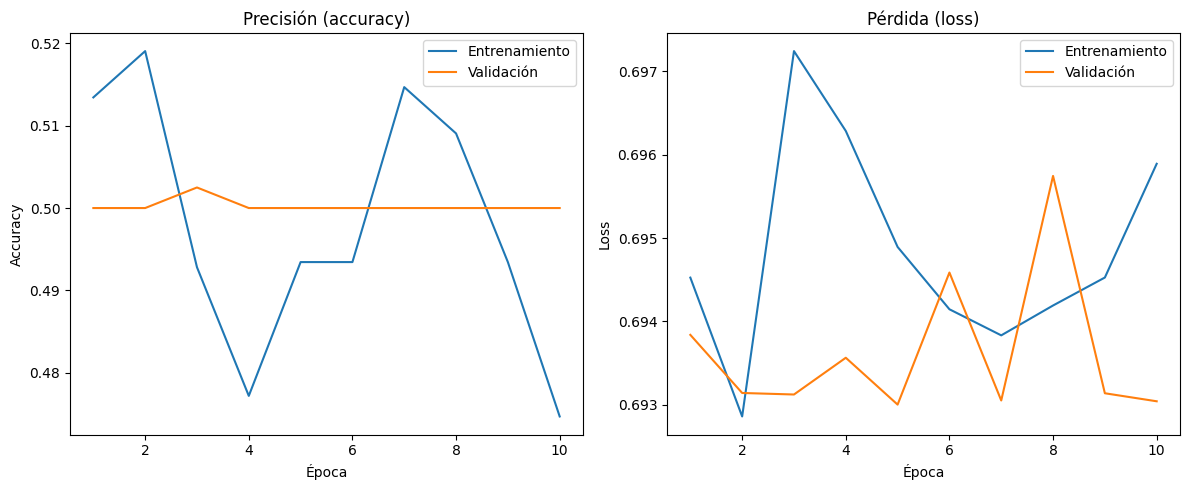

In [62]:
# Extraer m√©tricas del objeto history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Crear figura
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Entrenamiento')
plt.plot(epochs_range, val_acc, label='Validaci√≥n')
plt.title('Precisi√≥n (accuracy)')
plt.xlabel('√âpoca')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Entrenamiento')
plt.plot(epochs_range, val_loss, label='Validaci√≥n')
plt.title('P√©rdida (loss)')
plt.xlabel('√âpoca')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Conclusiones.

Regresion lineal utiliizando TF-IFD

üß† Interpretaci√≥n general:
Tu modelo tiene un rendimiento s√≥lido y equilibrado, con buena capacidad tanto para detectar verdaderos positivos (recall) como para evitar errores en las predicciones positivas (precision). El F1 Score confirma este equilibrio.



# Futuras Lineas.